# Time Series

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.recurrent import LSTM, GRU

Using Theano backend.


In [11]:
# since we are using stateful rnn tsteps can be set to 1
tsteps = 1
batch_size = 50

# number of elements ahead that are used to make the prediction
lahead = 1


def gen_cosine_amp(amp=100, period=25, x0=0, xn=50000, step=1, k=0.0001):
    """Generates an absolute cosine time series with the amplitude
    exponentially decreasing
    Arguments:
        amp: amplitude of the cosine function
        period: period of the cosine function
        x0: initial x of the time series
        xn: final x of the time series
        step: step of the time series discretization
        k: exponential rate
    """
    cos = np.zeros(((xn - x0) * step, 1, 1))
    for i in range(len(cos)):
        idx = x0 + i * step
        cos[i, 0, 0] = amp * np.cos(idx / (2 * np.pi * period))
        cos[i, 0, 0] = cos[i, 0, 0] * np.exp(-k * idx)
    return cos

In [25]:
print('Generating Data')
cos = gen_cosine_amp(amp=50, period=100, step=1)
print('Input shape:', cos.shape)

expected_output = np.zeros((len(cos), 1))
for i in range(len(cos) - lahead):
    expected_output[i, 0] = np.mean(cos[i + 1:i + lahead + 1])

print('Output shape')
print(expected_output.shape)
print("Sample: ",cos[0], expected_output[0])

Generating Data
Input shape: (50000, 1, 1)
Output shape
(50000, 1)
Sample:  [[ 50.]] [ 49.99493693]


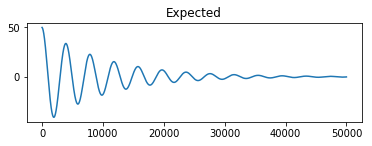

In [26]:
plt.subplot(2, 1, 1)
plt.plot(cos[:,0])
plt.title('Expected')
plt.show()

Creating Model
Training
Epoch 0 / 25
Epoch 1/1
50000/50000 [==============================] - 4s - loss: 393.1773     
Predicting
Ploting Results


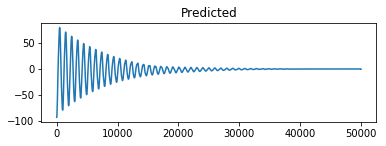

Epoch 1 / 25
Epoch 1/1
50000/50000 [==============================] - 4s - loss: 232.0185     
Predicting
Ploting Results


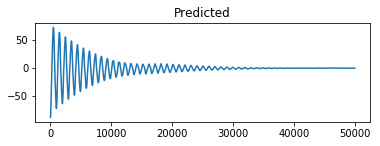

Epoch 2 / 25
Epoch 1/1
50000/50000 [==============================] - 4s - loss: 160.8886     
Predicting
Ploting Results


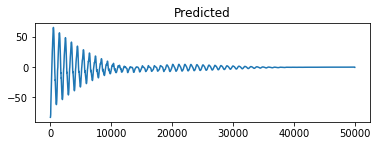

Epoch 3 / 25
Epoch 1/1
50000/50000 [==============================] - 4s - loss: 113.0914     
Predicting
Ploting Results


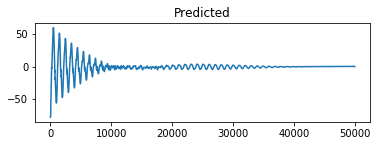

Epoch 4 / 25
Epoch 1/1
50000/50000 [==============================] - 4s - loss: 82.4811     
Predicting
Ploting Results


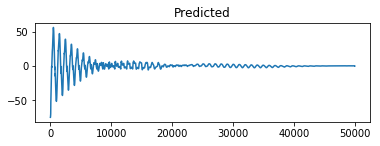

Epoch 5 / 25
Epoch 1/1
50000/50000 [==============================] - 4s - loss: 62.1604     
Predicting
Ploting Results


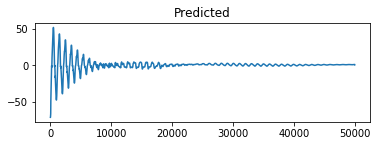

Epoch 6 / 25
Epoch 1/1
50000/50000 [==============================] - 4s - loss: 50.3948     
Predicting
Ploting Results


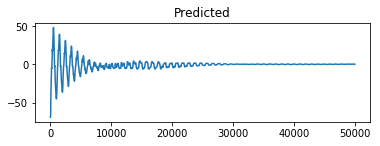

Epoch 7 / 25
Epoch 1/1
50000/50000 [==============================] - 5s - loss: 41.9208     
Predicting
Ploting Results


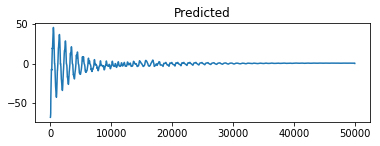

Epoch 8 / 25
Epoch 1/1
50000/50000 [==============================] - 5s - loss: 37.5189     
Predicting
Ploting Results


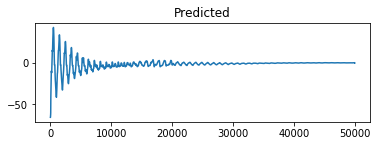

Epoch 9 / 25
Epoch 1/1
50000/50000 [==============================] - 5s - loss: 31.9621     
Predicting
Ploting Results


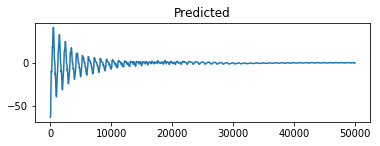

Epoch 10 / 25
Epoch 1/1
50000/50000 [==============================] - 5s - loss: 28.9520     
Predicting
Ploting Results


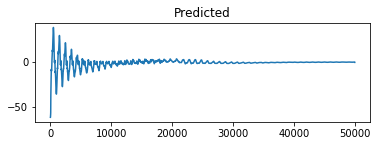

Epoch 11 / 25
Epoch 1/1
50000/50000 [==============================] - 5s - loss: 24.7037     
Predicting
Ploting Results


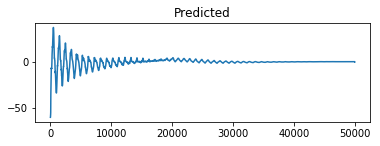

Epoch 12 / 25
Epoch 1/1
50000/50000 [==============================] - 5s - loss: 21.8330     
Predicting
Ploting Results


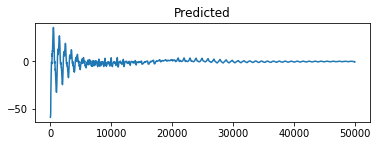

Epoch 13 / 25
Epoch 1/1
50000/50000 [==============================] - 5s - loss: 20.2971     
Predicting
Ploting Results


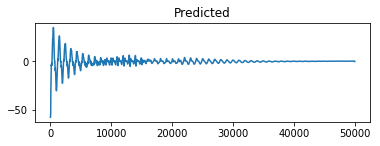

Epoch 14 / 25
Epoch 1/1
50000/50000 [==============================] - 5s - loss: 17.3272     
Predicting
Ploting Results


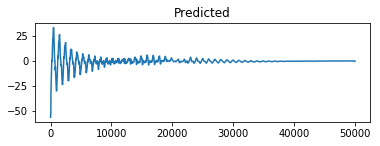

Epoch 15 / 25
Epoch 1/1
50000/50000 [==============================] - 5s - loss: 16.8684     
Predicting
Ploting Results


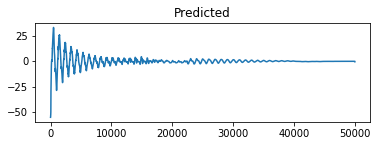

Epoch 16 / 25
Epoch 1/1
50000/50000 [==============================] - 5s - loss: 14.6787     
Predicting
Ploting Results


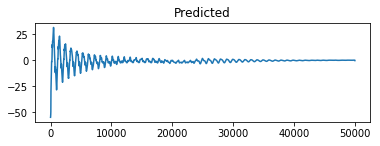

Epoch 17 / 25
Epoch 1/1
50000/50000 [==============================] - 5s - loss: 16.0872     
Predicting
Ploting Results


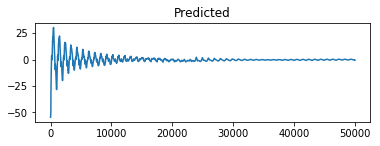

Epoch 18 / 25
Epoch 1/1
50000/50000 [==============================] - 5s - loss: 14.0138     
Predicting
Ploting Results


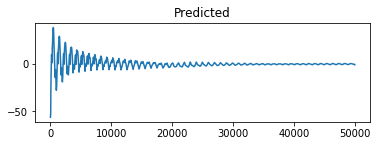

Epoch 19 / 25
Epoch 1/1
50000/50000 [==============================] - 5s - loss: 15.2034     
Predicting
Ploting Results


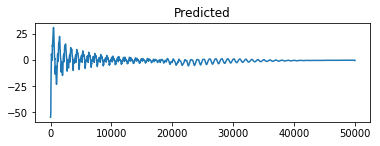

Epoch 20 / 25
Epoch 1/1
50000/50000 [==============================] - 6s - loss: 13.5800     
Predicting
Ploting Results


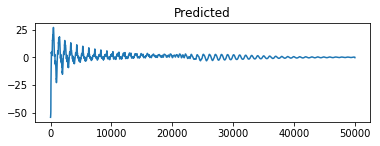

Epoch 21 / 25
Epoch 1/1
50000/50000 [==============================] - 5s - loss: 11.3827     
Predicting
Ploting Results


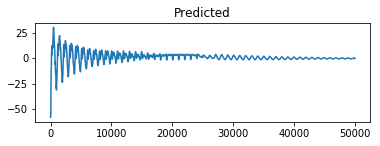

Epoch 22 / 25
Epoch 1/1
50000/50000 [==============================] - 5s - loss: 12.2659     
Predicting
Ploting Results


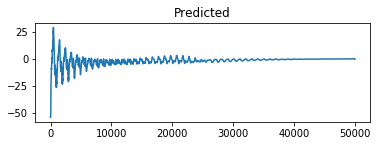

Epoch 23 / 25
Epoch 1/1
50000/50000 [==============================] - 5s - loss: 8.8613     
Predicting
Ploting Results


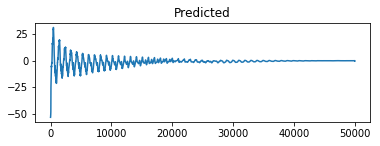

Epoch 24 / 25
Epoch 1/1
50000/50000 [==============================] - 5s - loss: 8.3214     
Predicting
Ploting Results


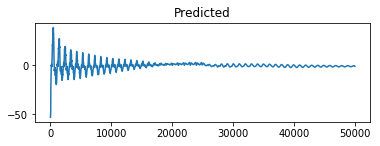

In [16]:
epochs = 25

print('Creating Model')
model = Sequential()
model.add(LSTM(50,
               batch_input_shape=(batch_size, tsteps, 1),
               return_sequences=True,
               stateful=True))
model.add(LSTM(50,
               batch_input_shape=(batch_size, tsteps, 1),
               return_sequences=False,
               stateful=True))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop')

print('Training')
for i in range(epochs):
    print('Epoch', i, '/', epochs)
    model.fit(cos,
              expected_output,
              batch_size=batch_size,
              verbose=1,
              epochs=1,
              shuffle=False)
    model.reset_states()

    print('Predicting')
    predicted_output = model.predict(cos, batch_size=batch_size)

    print('Ploting Results')
    plt.subplot(2, 1, 1)
    plt.plot(predicted_output-expected_output)

    plt.title('Predicted')
    plt.show()

Creating Model
Epoch 1/50
50000/50000 [==============================] - 4s - loss: 83.3014     
Epoch 2/50
50000/50000 [==============================] - 4s - loss: 39.0837     
Epoch 3/50
50000/50000 [==============================] - 4s - loss: 25.7454     
Epoch 4/50
50000/50000 [==============================] - 4s - loss: 13.8366     
Epoch 5/50
50000/50000 [==============================] - 4s - loss: 9.4090     
Epoch 6/50
50000/50000 [==============================] - 4s - loss: 7.4210     
Epoch 7/50
50000/50000 [==============================] - 4s - loss: 5.6967     
Epoch 8/50
50000/50000 [==============================] - 4s - loss: 5.6595     
Epoch 9/50
50000/50000 [==============================] - 4s - loss: 4.6675     
Epoch 10/50
50000/50000 [==============================] - 4s - loss: 4.1530     
Epoch 11/50
50000/50000 [==============================] - 4s - loss: 4.1345     
Epoch 12/50
50000/50000 [==============================] - 4s - loss: 4.6297     
Epoch 

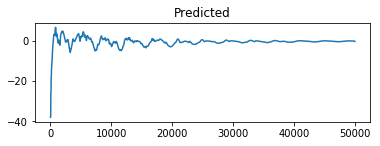

In [27]:
epochs = 50

print('Creating Model')
model = Sequential()
model.add(LSTM(50,
               batch_input_shape=(batch_size, tsteps, 1),
               return_sequences=True,
               stateful=True))
model.add(LSTM(50,
               batch_input_shape=(batch_size, tsteps, 1),
               return_sequences=False,
               stateful=True))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop')


model.fit(cos,
          expected_output,
          batch_size=batch_size,
          verbose=1,
          epochs=epochs,
          shuffle=False)

print('Predicting')
predicted_output = model.predict(cos, batch_size=batch_size)

print('Ploting Results')
plt.subplot(2, 1, 1)
plt.plot(predicted_output-expected_output)

plt.title('Predicted')
plt.show()